In [1]:
import pandas as pd

# all_ldt_trials3 = pd.read_excel('all ldt subs_all trials3.xlsx')
all_naming_sub = pd.read_excel('all naming subjects.xlsx') #useful - has results per person per target word 
# items_spread = pd.read_excel('items_spreadsheet.xls')
# ldt_subjects = pd.read_excel('LDT subject database.xlsx')
# ldt_word_item_ana = pd.read_excel('ldt word item analysis.xlsx')
item_ana = pd.read_excel('naming word item analysis.xlsx') #also useful - has 1 row per target word and includes analysis per target word


In [2]:
item_ana.columns

Index(['target', 'short_1st_rel', 'short_1st_rel_err', 'short_other_rel',
       'short_other_rel_err', 'short_1st_un', 'short_1st_un_err',
       'short_other_un', 'short_other_un_err', 'long_1st_rel',
       'long_1st_rel_err', 'long_other_rel', 'long_other_rel_err',
       'long_1st_un', 'long_1st_un_err', 'long_other_un', 'long_other_un_err',
       'short_first_priming', 'short_other_priming', 'long_first_priming',
       'long_other_priming', 'VAR00023', 'VAR00024', 'prime_1st',
       'target_length', 'target_loghal', 'target_subtitle',
       'target_logsubtitle', 'target_ortho', 'target_pos', 'target_elprt',
       'target_elpz', 'target_elpacc', 'target_fanin',
       'firstassoc_logsubtitle', 'firstassoc_length', 'firstassoc_loghal',
       'firstassoc_ortho', 'firstassoc_elp', 'VAR00002',
       'firstassoc_relationtype', 'firstassoc_fas', 'firstassoc_bas',
       'firstassoc_fanout', 'firstassoc_fanin', 'firstassoc_lsa',
       'firstassoc_lsa_un', 'prime_1st_unrelated', '

'target', - target word - str
'short_1st_rel', - short 1st related? - int
'short_1st_rel_err', - short 1st related error? - int
'short_other_rel', - short other related? - int
'short_other_rel_err', - short other related error? - int
'short_1st_un', - short 1st unrelated? - int
'short_1st_un_err', - short 1st unrelated error? - int
'short_other_un', - short other unrelated? - int
'short_other_un_err' - short other unrelated error? - int

'long_1st_rel', - long 1st related?  - int
'long_1st_rel_err', - long 1st related error? - int
'long_other_rel', - long other rel? - int
'long_other_rel_err', - long other rel err?  - int
'long_1st_un', - long 1st unrelated?  - int
'long_1st_un_err', - long 1st unrelated err? - int
'long_other_un',  - long other unrel? - int
'long_other_un_err' - long other unrelated error - int

'short_first_priming', - int
'short_other_priming', - int
'long_first_priming', - int
'long_other_priming', - int
'VAR00023', -str
'VAR00024', -str
'prime_1st', - first primed word for each target -str
'target_length' - length of target word - int

<!-- unknown -->
'target_loghal', - int
'target_subtitle',- int
'target_logsubtitle', - int
'target_ortho', - int
'target_pos', - str
'target_elprt',- int
'target_elpz', - int
'target_elpacc', - int
'target_fanin'- int


In [18]:
item_ana[['firstassoc_logsubtitle', 'firstassoc_length', 'firstassoc_loghal',
       'firstassoc_ortho', 'firstassoc_elp', 'VAR00002',
       'firstassoc_relationtype', 'firstassoc_fas']]

,firstassoc_logsubtitle,firstassoc_length,firstassoc_loghal,firstassoc_ortho,firstassoc_elp,VAR00002,firstassoc_relationtype,firstassoc_fas
0,1.34,6,5.57,0.0,737.93,NaN,synonym,0.053
1,1.85,10,9.49,0.0,714.32,NaN,synonym,0.282
2,3.56,6,11.17,2.0,577.39,NaN,antonym,0.340
3,3.16,5,11.41,0.0,602.57,NaN,antonym,0.503
4,4.24,3,13.43,0.0,618.35,NaN,fpa,0.192
...,...,...,...,...,...,...,...,...
1656,4.11,4,11.40,20.0,578.81,NaN,antonym,0.555
1657,3.75,4,11.41,13.0,571.64,NaN,synonym,0.250
1658,1.93,6,5.38,3.0,618.21,NaN,synonym,0.387
1659,2.20,8,7.87,0.0,660.74,NaN,fpa,0.176


In [20]:
item_ana['firstassoc_relationtype'].unique()

array(['synonym', 'antonym', 'fpa', 'script', 'unclassified', 'category',
       'supraordinate', 'instrument', 'functional property', 'bpa',
       'unclassifed', 'perceptual property', 'Instrument', 'action', nan,
       'antonymn'], dtype=object)

In [15]:
truth = []
false = []

for row in range(item_ana.shape[0]):
    if (item_ana['VAR00023'].iloc[row] != item_ana['VAR00024'].iloc[row]):
        false.append([item_ana['VAR00023'].iloc[row],item_ana['VAR00024'].iloc[row]])

all naming subjects seems to be the dataset with the naming tasks which we are interested in - the one with no fake words
also includes subject demographic, RT, acc, prime and target words - look for SOA

item_ana also interesting since it has result per target word which means it might be the average results per target word

In [24]:
import matplotlib.pyplot as plt

wordnet_sim = pd.read_csv('NT_trials_with_path_sim.csv')

In [44]:
wordnet_sim.columns

Index(['subjID', 'prime', 'target', 'RT', 'accuracy', 'Path Similarity'], dtype='object')

there are 1666 unique target words 

there are 3348 unique prime words

continue by finding the averaged results of all participants for each unique prime-target pair 

focus analysis on prime-target pair 

the new dataset will include mean and std for each prime-target pair for RT, acc

path similarity is constant for prime-target pair

In [101]:
target_uni = wordnet_sim['target'].unique()

avg_data = pd.DataFrame(columns = ['target','prime','RT', 'RT_std','acc', 'acc_std','path sim']) 


for target in target_uni:
    
    subset_upper = wordnet_sim[wordnet_sim['target'] == target]

    prime_uni = subset_upper['prime'].unique()

    for prime in prime_uni:

        subset_lower = subset_upper[subset_upper['prime'] == prime]

        row = {'target': [target],'prime': [prime],\
            'RT': [subset_lower['RT'].mean()], \
                'RT_std': [subset_lower['RT'].std()], 'acc': [subset_lower['accuracy'].mean()], 'acc_std': [subset_lower['accuracy'].std()], \
                    'path sim': [subset_lower['Path Similarity'].iloc[0]]}

        row_df = pd.DataFrame(row)
        avg_data = pd.concat([avg_data, row_df], axis=0, ignore_index=True)

In [121]:
avg_data[avg_data['path sim'] == 1].describe()

,RT,RT_std,acc,acc_std,path sim
count,70.000000,70.000000,70.000000,70.000000,70.0
mean,539.670145,168.375597,0.991904,0.044981,1.0
std,35.244341,55.711143,0.015652,0.077441,0.0
min,447.646154,78.973020,0.933333,0.000000,1.0
25%,516.090625,127.646516,0.987607,0.000000,1.0
50%,541.179895,148.519899,1.000000,0.000000,1.0
75%,561.259007,209.137507,1.000000,0.111273,1.0
max,650.950000,317.130216,1.000000,0.251549,1.0


In [133]:
path_uni = avg_data['path sim'].unique()
path_uni.sort()

rt = []
rt_std = []
acc = []
acc_std = []

for path in path_uni:
    path_data = avg_data[avg_data['path sim'] == path]

    rt.append(path_data['RT'].mean())
    rt_std.append(path_data['RT_std'].mean())
    acc.append(path_data['acc'].mean())
    acc_std.append(path_data['acc_std'].mean())


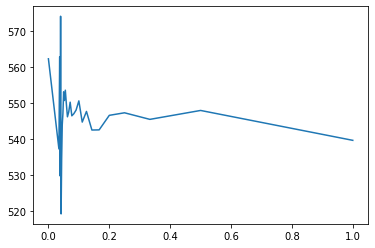

In [142]:
plt.plot(path_uni, rt)